In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df=pd.read_csv('gdp.csv')

In [3]:
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [4]:
for i in df.columns[2:]:
    for j in df[i]:
        if type(j)==str:
            df[i]=df[i].replace(j,j.replace(',','.'))
    df[i].astype(float)        

In [5]:
for i in df.columns[2:]:
    df[i]=df[i].astype(float)

In [6]:
df.nunique()

Country                               227
Region                                 11
Population                            227
Area (sq. mi.)                        226
Pop. Density (per sq. mi.)            219
Coastline (coast/area ratio)          151
Net migration                         157
Infant mortality (per 1000 births)    220
GDP ($ per capita)                    130
Literacy (%)                          140
Phones (per 1000)                     214
Arable (%)                            203
Crops (%)                             162
Other (%)                             209
Climate                                 6
Birthrate                             220
Deathrate                             201
Agriculture                           150
Industry                              155
Service                               167
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    float64
 3   Area (sq. mi.)                      227 non-null    float64
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [8]:
df.isnull().sum()


Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [9]:
data=df

In [10]:
for i in df.columns[2:]:
    if i=='Climate':
        df[i]=df[i].fillna(df[i].mode())   
        print(df[i].mode())
    else:
        df[i]=df[i].fillna(df[i].mean())
        

0    2.0
Name: Climate, dtype: float64


In [11]:
data

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,48.0,0.00,23.060000,163.070000,700.000000,36.000000,3.200000,12.13,0.22,87.65,1.0,46.600000,20.340000,0.380000,0.240000,0.380000
1,Albania,EASTERN EUROPE,3581655.0,28748.0,124.6,1.26,-4.930000,21.520000,4500.000000,86.500000,71.200000,21.09,4.42,74.49,3.0,15.110000,5.220000,0.232000,0.188000,0.579000
2,Algeria,NORTHERN AFRICA,32930091.0,2381740.0,13.8,0.04,-0.390000,31.000000,6000.000000,70.000000,78.100000,3.22,0.25,96.53,1.0,17.140000,4.610000,0.101000,0.600000,0.298000
3,American Samoa,OCEANIA,57794.0,199.0,290.4,58.29,-20.710000,9.270000,8000.000000,97.000000,259.500000,10.00,15.00,75.00,2.0,22.460000,3.270000,0.150844,0.282711,0.565283
4,Andorra,WESTERN EUROPE,71201.0,468.0,152.1,0.00,6.600000,4.050000,19000.000000,100.000000,497.200000,2.22,0.00,97.78,3.0,8.710000,6.250000,0.150844,0.282711,0.565283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492.0,5860.0,419.9,0.00,2.980000,19.620000,800.000000,82.838278,145.200000,16.90,18.97,64.13,3.0,31.670000,3.920000,0.090000,0.280000,0.630000
223,Western Sahara,NORTHERN AFRICA,273008.0,266000.0,1.0,0.42,0.038125,35.506964,9689.823009,82.838278,236.061435,0.02,0.00,99.98,1.0,22.114732,9.241345,0.150844,0.282711,0.400000
224,Yemen,NEAR EAST,21456188.0,527970.0,40.6,0.36,0.000000,61.500000,800.000000,50.200000,37.200000,2.78,0.24,96.98,1.0,42.890000,8.300000,0.135000,0.472000,0.393000
225,Zambia,SUB-SAHARAN AFRICA,11502010.0,752614.0,15.3,0.00,0.000000,88.290000,800.000000,80.600000,8.200000,7.08,0.03,92.90,2.0,41.000000,19.930000,0.220000,0.290000,0.489000


In [12]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          0
Infant mortality (per 1000 births)     0
GDP ($ per capita)                     0
Literacy (%)                           0
Phones (per 1000)                      0
Arable (%)                             0
Crops (%)                              0
Other (%)                              0
Climate                               22
Birthrate                              0
Deathrate                              0
Agriculture                            0
Industry                               0
Service                                0
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [14]:
df['Climate']=imputer.fit_transform(df['Climate'].values.reshape(-1,1))

In [15]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.125551,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.856710,35.154225,10026.881258,18.920483,225.965194,12.982573,8.324390,16.069256,0.665761,11.102286,4.945670,0.141843,0.133288,0.160243
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.905000,8.215000,1900.000000,76.400000,38.500000,3.380000,0.190000,71.985000,2.000000,12.725000,5.975000,0.040000,0.200000,0.443500
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.050000,5600.000000,90.300000,181.600000,10.530000,1.080000,85.380000,2.000000,18.900000,8.170000,0.116000,0.282000,0.565283
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.980000,55.335000,15700.000000,97.800000,382.900000,20.000000,4.557111,95.230000,2.250000,29.770000,10.580000,0.211000,0.335000,0.671500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [16]:
data=df.drop(['Country','Region'],axis=1)

In [17]:
cr=data.corr()

In [37]:
df['Climate'].value_counts()

Climate
2    133
4     48
0     29
1      8
5      6
3      3
Name: count, dtype: int64

In [36]:
df.to_csv('gdp_cleaned.csv',index=True)

<Axes: >

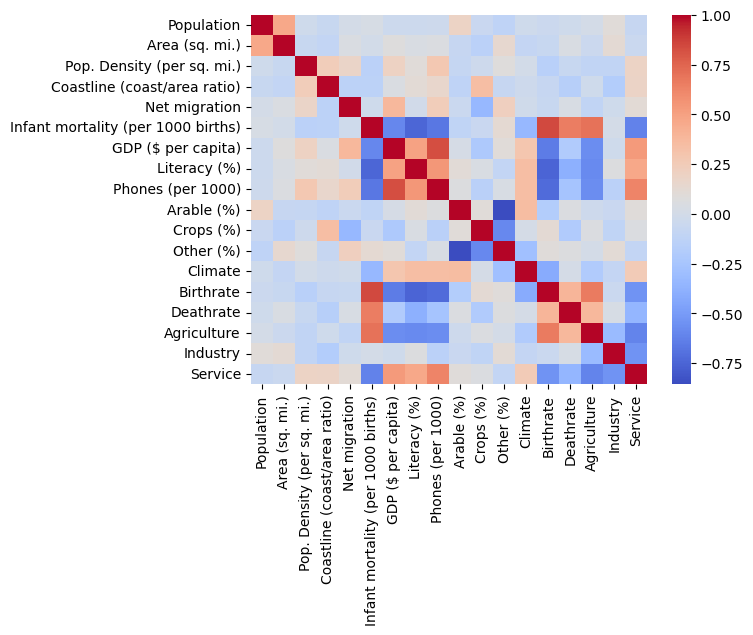

In [18]:
sns.heatmap(cr,cmap='coolwarm')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'ASIA (EX. NEAR EAST)         '),
  Text(1, 0, 'EASTERN EUROPE                     '),
  Text(2, 0, 'NORTHERN AFRICA                    '),
  Text(3, 0, 'OCEANIA                            '),
  Text(4, 0, 'WESTERN EUROPE                     '),
  Text(5, 0, 'SUB-SAHARAN AFRICA                 '),
  Text(6, 0, 'LATIN AMER. & CARIB    '),
  Text(7, 0, 'C.W. OF IND. STATES '),
  Text(8, 0, 'NEAR EAST                          '),
  Text(9, 0, 'NORTHERN AMERICA                   '),
  Text(10, 0, 'BALTICS                            ')])

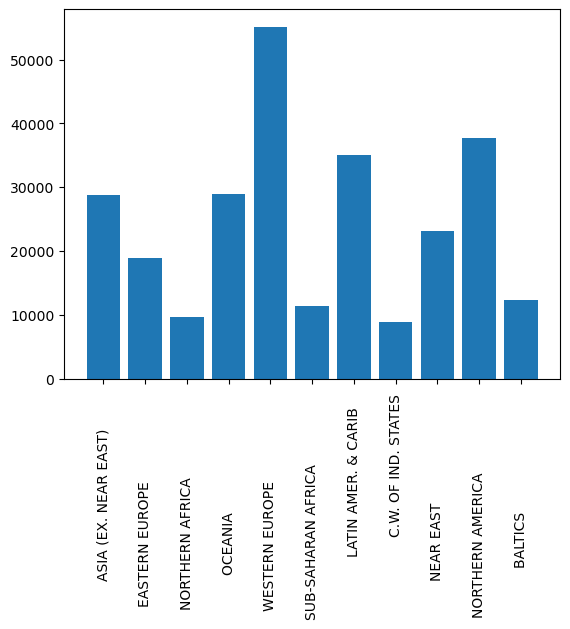

In [19]:
plt.bar(df['Region'],df['GDP ($ per capita)'])
plt.xticks(rotation=90)

In [20]:
#sns.pairplot(df)

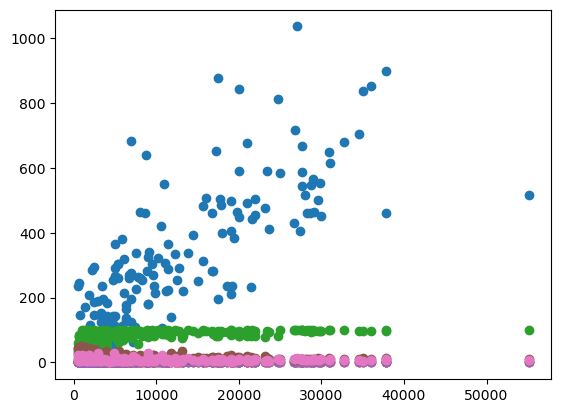

In [21]:
plt.scatter(df['GDP ($ per capita)'],df['Phones (per 1000)'])
plt.scatter(df['GDP ($ per capita)'],df['Service'])
plt.scatter(df['GDP ($ per capita)'],df['Literacy (%)'])
plt.scatter(df['GDP ($ per capita)'],df['Agriculture'])
plt.scatter(df['GDP ($ per capita)'],df['Industry'])
plt.scatter(df['GDP ($ per capita)'],df['Birthrate'])
plt.scatter(df['GDP ($ per capita)'],df['Deathrate'])

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Region']=le.fit_transform(df['Region'])
df['Climate']=le.fit_transform(df['Climate'])

In [23]:
l2=LabelEncoder()
df['Country']=l2.fit_transform(df['Country'])

In [24]:
en=l2.inverse_transform(df['Country'])

In [25]:
l2.classes_
enn=l2.transform(l2.classes_)

In [26]:
enc=np.hstack((l2.classes_.reshape(-1,1),enn.reshape(-1,1)))

In [27]:
enc=pd.DataFrame(enc,columns=['Country','Encoded'])

In [28]:
enc['Country']=enc['Country'].astype(str)

In [29]:
enc

,Country,Encoded
0,Afghanistan,0
1,Albania,1
2,Algeria,2
3,American Samoa,3
4,Andorra,4
...,...,...
222,West Bank,222
223,Western Sahara,223
224,Yemen,224
225,Zambia,225


In [30]:
def ws(x):
    return x.strip()

In [31]:
enc['Country']=enc['Country'].apply(ws)
    

In [32]:
enc

,Country,Encoded
0,Afghanistan,0
1,Albania,1
2,Algeria,2
3,American Samoa,3
4,Andorra,4
...,...,...
222,West Bank,222
223,Western Sahara,223
224,Yemen,224
225,Zambia,225


In [33]:
df.sample(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
63,63,9,4786994.0,121320.0,39.5,1.84,0.00,74.87,700.0,58.600000,7.900000,4.95,0.03,95.02,1,34.33,9.60,0.102,0.254,0.643
192,192,9,41236378.0,2505810.0,16.5,0.03,-0.02,62.50,1900.0,61.100000,16.300000,6.83,0.18,92.99,2,34.53,8.97,0.387,0.203,0.410
93,93,10,299388.0,103000.0,2.9,4.83,2.38,3.31,30900.0,99.900000,647.700000,0.07,0.00,99.93,4,13.64,6.72,0.086,0.150,0.765
34,34,0,13881427.0,181040.0,76.7,0.24,0.00,71.48,1900.0,69.400000,2.600000,20.96,0.61,78.43,2,26.90,9.06,0.350,0.300,0.350
89,89,4,8308504.0,27750.0,299.4,6.38,-3.40,73.45,1600.0,52.900000,16.900000,28.30,11.61,60.09,2,36.44,12.17,0.280,0.200,0.520
123,123,3,2050554.0,25333.0,80.9,0.00,-1.45,10.09,6700.0,82.838278,260.000000,22.26,1.81,75.93,4,12.02,8.77,0.118,0.319,0.563
50,50,3,4494749.0,56542.0,79.5,10.32,1.58,6.84,10600.0,98.500000,420.400000,26.09,2.27,71.65,2,9.61,11.48,0.070,0.308,0.622
132,132,9,3177388.0,1030700.0,3.1,0.07,0.00,70.89,1800.0,41.700000,12.900000,0.48,0.01,99.51,0,40.99,12.16,0.250,0.290,0.460
189,188,9,44187637.0,1219912.0,36.2,0.23,-0.29,61.81,10700.0,86.400000,107.000000,12.08,0.79,87.13,0,18.20,22.00,0.025,0.303,0.671
52,52,5,784301.0,9250.0,84.8,7.01,0.43,7.18,19200.0,97.600000,236.061435,7.79,4.44,87.77,4,12.56,7.68,0.037,0.198,0.765


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data1=sc.fit_transform(df)


In [ ]:
data1=pd.DataFrame(data1,columns=df.columns)

<Axes: >

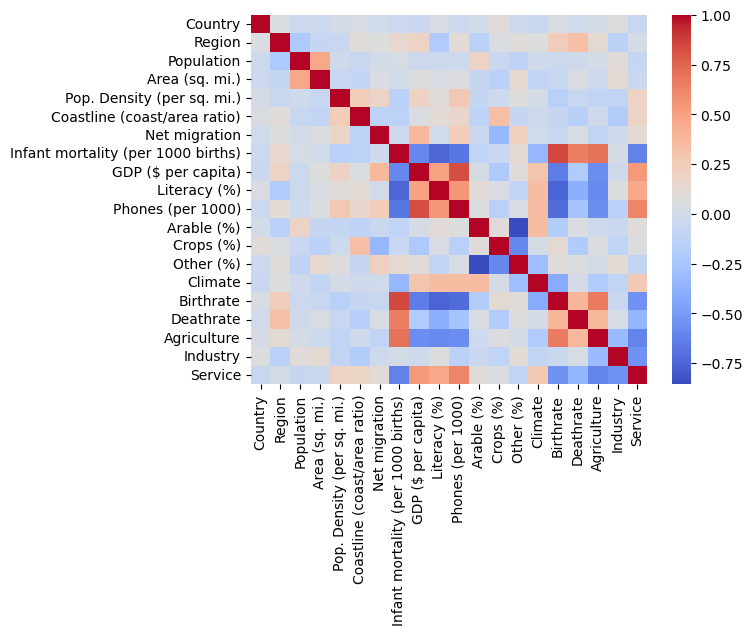

In [ ]:
sns.heatmap(pd.DataFrame(data1).corr(),cmap='coolwarm')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data1.drop(['GDP ($ per capita)'],axis=1),data1['GDP ($ per capita)'],test_size=0.2,random_state=42)


In [ ]:
x_train_new,x_test_new,y_train_new,y_test_new=train_test_split(df.drop(['GDP ($ per capita)'],axis=1),df['GDP ($ per capita)'],test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=42,max_depth=5,)


In [ ]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, n_jobs=-1, random_state=42)

In [ ]:
df['Climate'].mode().values

array([2], dtype=int64)

In [ ]:
y_pred=rf.predict(x_test)

In [ ]:
rf.score(x_test,y_test)

0.9073047996919958

In [ ]:
er=y_test-y_pred    

C:\Users\prateek\AppData\Local\Temp\ipykernel_12576\1856550780.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(er)


<Axes: xlabel='GDP ($ per capita)', ylabel='Density'>

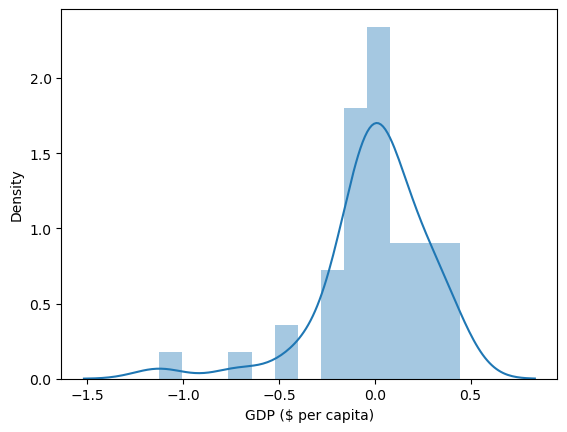

In [ ]:
sns.distplot(er)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,x_train,y_train,cv=5)
score.mean()



0.7068005597384186

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5,n_jobs=-1)



In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(n_jobs=-1)
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8123894660155478

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)



In [ ]:
rf4=RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=42,max_depth=5,)
rf4.fit(x_train_pca,y_train)
rf4.score(x_test_pca,y_test)

0.8325667871684228

In [ ]:
lr.fit(x_train_pca,y_train)

LinearRegression(n_jobs=-1)

In [ ]:
lr.score(x_test_pca,y_test)

0.5631281667087153

In [ ]:
rf2=RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=42,max_depth=5,)
rf2.fit(x_train_pca,y_train)
rf2.score(x_test_pca,y_test)

0.8325667871684228

In [ ]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf',degree=1)
svr.fit(x_train,y_train)
svr.score(x_test,y_test)

0.8540095234535768

In [ ]:
data2=df
data2.drop(['Country','Region'],axis=1,inplace=True)

In [ ]:
x_train2,x_test2,y_train2,y_test2=train_test_split(data2.drop(['GDP ($ per capita)',],axis=1),data2['GDP ($ per capita)'],test_size=0.2,random_state=42)

In [ ]:
rf3=RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=42,max_depth=5)
rf3.fit(x_train2,y_train2)
rf3.score(x_test2,y_test2)


0.9113425646237152

In [ ]:
from sklearn.pipeline import Pipeline
pipe=Pipeline([('sp',SimpleImputer(missing_values=np.nan,strategy='mean')),('sc',StandardScaler()),('rf',RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=42,max_depth=5))])

In [ ]:
x_train2

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
60,78887007.0,1001450.0,78.8,0.24,-0.22,32.59,57.7,131.8,2.87,0.48,96.65,0,22.94,5.23,0.149,0.357,0.493
164,10605870.0,92391.0,114.8,1.94,3.57,5.05,93.3,399.2,21.75,7.81,70.44,4,10.72,10.50,0.053,0.274,0.673
68,5231372.0,338145.0,15.5,0.37,0.95,3.57,100.0,405.3,7.19,0.03,92.78,4,10.45,9.86,0.028,0.295,0.676
183,6005250.0,71740.0,83.7,0.56,0.00,143.64,31.4,4.0,6.98,0.89,92.13,2,45.76,23.03,0.490,0.310,0.210
216,27307134.0,447400.0,61.0,0.00,-1.72,71.10,99.3,62.9,10.83,0.83,88.34,0,26.36,7.84,0.342,0.229,0.430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,15233244.0,2717300.0,5.6,0.00,-3.35,29.21,98.4,164.1,7.98,0.05,91.97,5,16.00,9.42,0.067,0.386,0.547
14,303770.0,13940.0,21.8,25.41,-2.20,25.21,95.6,460.6,0.80,0.40,98.80,2,17.57,9.05,0.030,0.070,0.900
92,9981334.0,93030.0,107.3,0.00,0.86,8.57,99.4,336.2,50.09,2.06,47.85,4,9.72,13.11,0.037,0.312,0.651
179,27019731.0,1960582.0,13.8,0.13,-2.71,13.24,78.8,140.6,1.67,0.09,98.24,0,29.34,2.58,0.033,0.613,0.354


In [ ]:
pipe.fit(x_train2,y_train2)

Pipeline(steps=[('sp', SimpleImputer()), ('sc', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_depth=5, n_jobs=-1,
                                       random_state=42))])

In [ ]:
import pickle
pickle.dump(pipe,open('model.pkl','wb')) 


In [ ]:
x_test2.columns

Index(['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'Literacy (%)',
       'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [ ]:
x_train2.loc[0].values.reshape(1,-1)

array([[3.1056997e+07, 6.4750000e+05, 4.8000000e+01, 0.0000000e+00,
        2.3060000e+01, 1.6307000e+02, 3.6000000e+01, 3.2000000e+00,
        1.2130000e+01, 2.2000000e-01, 8.7650000e+01, 0.0000000e+00,
        4.6600000e+01, 2.0340000e+01, 3.8000000e-01, 2.4000000e-01,
        3.8000000e-01]])

In [ ]:
x_test2.shape

(46, 17)

In [ ]:
rf3.predict(x_train2.loc[0].values.reshape(1,-1))

c:\Users\prateek\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1142.65527139])

In [ ]:
score2=cross_val_score(rf3,x_test2,y_test2,cv=5)

In [ ]:
score2.mean()

0.7319450743072927

In [ ]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy,z = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h),np.arange(y_min, y_max, h))
    return xx, yy

In [ ]:
x_train_pca[:,0].shape

(181,)

In [ ]:
y_train

60    -0.568711
164    0.830621
68     1.770173
183   -0.918544
216   -0.798601
         ...   
106   -0.338821
14     0.700683
92     0.420817
179    0.210917
102   -0.578706
Name: GDP ($ per capita), Length: 181, dtype: float64